# Multi-modal RAG with LangChain

## SetUp

Install the dependencies you need to run the notebook.

In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# for linux
# %sudo apt-get install poppler-utils tesseract-ocr libmagic-dev

# for mac
# %brew install poppler tesseract libmagic

In [1]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Extract the data

Extract the elements of the PDF that we will be able to use in the retrieval process. These elements can be: Text, Images, Tables, etc.

### Partition PDF tables, text, and images

In [ ]:
#居然給我Error
!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-eng

In [3]:
# 安裝必要的依賴
# !apt-get install -y poppler-utils
# !apt-get install -y tesseract-ocr
# !apt-get install -y tesseract-ocr-eng

# 安裝和下載 NLTK 數據
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')  # 添加這行
nltk.download('popular')    # 下載常用包集合，以防萬一

from unstructured.partition.pdf import partition_pdf
import os

# 設置文件路徑
file_path = "/Users/kevinluo/Documents/multimodal_rag_test/data/attention.pdf"

# 檢查文件是否存在
if os.path.exists(file_path):
    print(f"File exists at: {file_path}")
else:
    print(f"File not found at: {file_path}")
    raise FileNotFoundError(f"File not found at: {file_path}")

# 使用簡化的參數先測試
chunks = partition_pdf(
    filename=file_path,
    strategy="fast",  # 改用快速模式先測試
    chunking_strategy="basic",  # 使用基本分割策略
)

# 打印分割結果
print(f"Successfully extracted {len(chunks)} chunks")

# 查看前幾個 chunks 的內容
for i, chunk in enumerate(chunks[:3]):
    print(f"\nChunk {i+1}:")
    print(chunk)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1006)>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1006)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading popular: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     

File exists at: /Users/kevinluo/Documents/multimodal_rag_test/data/attention.pdf
Successfully extracted 107 chunks

Chunk 1:
3 2 0 2

g u A 2

] L C . s c [

7 v 2 6 7 3 0 . 6 0 7 1 : v i X r a

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

Attention Is All You Need

Ashish Vaswani∗ Google Brain avaswani@google.com

Noam Shazeer∗ Google Brain noam@google.com

Niki Parmar∗ Google Research nikip@google.com

Jakob Uszkoreit∗ Google Research usz@google.com

Chunk 2:
Llion Jones∗ Google Research llion@google.com

Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu

Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com

Illia Polosukhin∗ ‡ illia.polosukhin@gmail.com

Abstract

Chunk 3:
The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models als

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1006)>


False

In [5]:
# from unstructured.partition.pdf import partition_pdf
# /content/attention.pdf
# output_path = "./content/"
# file_path = output_path + 'attention.pdf'

# # Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
# chunks = partition_pdf(
#     filename=file_path,
#     infer_table_structure=True,            # extract tables
#     strategy="hi_res",                     # mandatory to infer tables

#     extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
#     # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

#     extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

#     chunking_strategy="by_title",          # or 'basic'
#     max_characters=10000,                  # defaults to 500
#     combine_text_under_n_chars=2000,       # defaults to 0
#     new_after_n_chars=6000,

#     # extract_images_in_pdf=True,          # deprecated
# )

# !apt-get install -y poppler-utils

from unstructured.partition.pdf import partition_pdf
import os

# 正確設置文件路徑
file_path = "/Users/kevinluo/Documents/multimodal_rag_test/data/attention.pdf"

# 驗證文件是否存在
if os.path.exists(file_path):
    print(f"File exists at: {file_path}")
else:
    print(f"File not found at: {file_path}")
    raise FileNotFoundError(f"File not found at: {file_path}")

# # 如果文件存在，執行分割
# chunks = partition_pdf(
#     filename=file_path,
#     infer_table_structure=True,
#     strategy="hi_res",
#     extract_image_block_types=["Image"],
#     extract_image_block_to_payload=True,
#     chunking_strategy="by_title",
#     max_characters=10000,
#     combine_text_under_n_chars=2000,
#     new_after_n_chars=6000,
# )
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

File exists at: /Users/kevinluo/Documents/multimodal_rag_test/data/attention.pdf


In [6]:
# We get 2 types of elements from the partition_pdf function
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [7]:
# Each CompositeElement containes a bunch of related elements.
# This makes it easy to use these elements together in a RAG pipeline.

chunks[0].metadata.orig_elements

In [8]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

IndexError: list index out of range

### Separate extracted elements into tables, text, and images

In [9]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [10]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

#### Check what the images look like

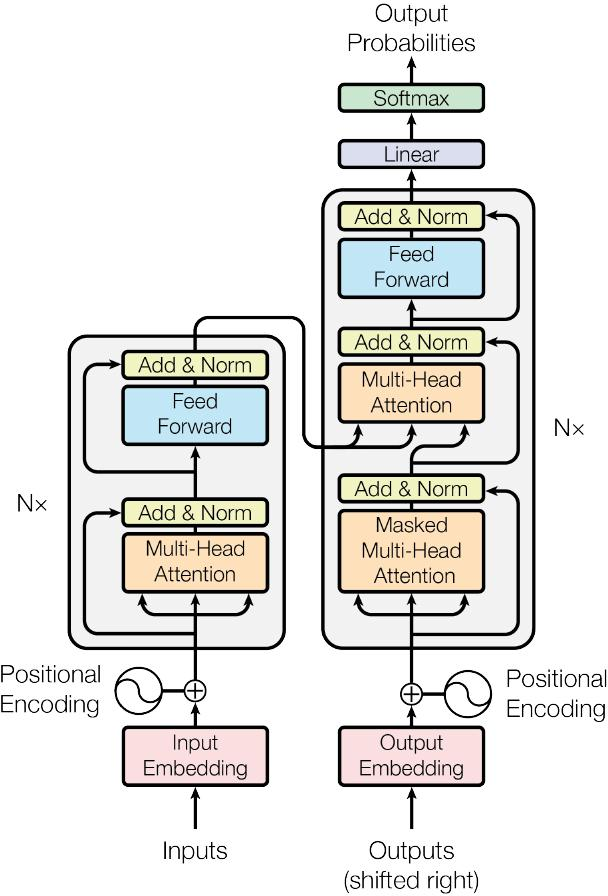

In [11]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use open source models available on Groq.

In [12]:
%pip install -Uq langchain-groq


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [16]:
# Prompt
#claude 我希望你有任何英文的prompt你都可以幫我改成繁體中文的版本給系統中的llm知道
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
summarize_chain

{
  element: RunnableLambda(lambda x: x)
}
| ChatPromptTemplate(input_variables=['element'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['element'], input_types={}, partial_variables={}, template='\nYou are an assistant tasked with summarizing tables and text.\nGive a concise summary of the table or text.\n\nRespond only with the summary, no additionnal comment.\nDo not start your message by saying "Here is a summary" or anything like that.\nJust give the summary as it is.\n\nTable or text chunk: {element}\n\n'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7df6f7f02190>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7df6f7f039d0>, model_name='llama-3.1-8b-instant', temperature=0.5, model_kwargs={}, groq_api_key=SecretStr('**********'))
| StrOutputParser()

In [ ]:
from groq import Groq
import os

# 確認 API key 是否設置
api_key = os.getenv("GROQ_API_KEY")
if not api_key:
    print("GROQ_API_KEY not found in environment variables")
else:
    print("GROQ_API_KEY found:", api_key[:6] + "..." + api_key[-4:])  # 只顯示部分 API key

# 測試 API 連接
try:
    client = Groq(api_key=api_key)

    # 嘗試一個簡單的完成請求
    completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": "Say 'Hello, this is a test!'"
            }
        ],
        model="mixtral-8x7b-32768",  # Groq 支持的模型
    )

    print("\nAPI Test Result:")
    print("Status: Success!")
    print("Response:", completion.choices[0].message.content)

except Exception as e:
    print("\nAPI Test Result:")
    print("Status: Failed")
    print("Error:", str(e))

GROQ_API_KEY found: gsk_9u...rCxw

API Test Result:
Status: Success!
Response: Hello, this is a test! I'm an helpful AI, here to make your life easier. Is there something specific you would like to ask or talk about? I'm ready to help with any questions or tasks you have.


In [17]:
import os
from langsmith import Client

# 檢查 LangChain API key 設置
langchain_api_key = os.getenv("LANGCHAIN_API_KEY")
if not langchain_api_key:
    print("LANGCHAIN_API_KEY not found in environment variables")
else:
    print("LANGCHAIN_API_KEY found:", langchain_api_key[:6] + "..." + langchain_api_key[-4:])

# 測試 LangSmith API 連接
try:
    client = Client()
    # 嘗試獲取項目列表來測試連接
    projects = client.list_projects()
    print("\nLangSmith API Test Result:")
    print("Status: Success!")
    print("Connected to LangSmith successfully!")

except Exception as e:
    print("\nLangSmith API Test Result:")
    print("Status: Failed")
    print("Error:", str(e))

# 檢查其他相關的 LangChain 環境變量
print("\nOther LangChain Environment Variables:")
print("LANGCHAIN_TRACING_V2:", os.getenv("LANGCHAIN_TRACING_V2"))
print("LANGCHAIN_ENDPOINT:", os.getenv("LANGCHAIN_ENDPOINT"))
print("LANGCHAIN_PROJECT:", os.getenv("LANGCHAIN_PROJECT"))

LANGCHAIN_API_KEY found: lsv2_p...740c

LangSmith API Test Result:
Status: Success!
Connected to LangSmith successfully!

Other LangChain Environment Variables:
LANGCHAIN_TRACING_V2: true
LANGCHAIN_ENDPOINT: None
LANGCHAIN_PROJECT: None


In [18]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})



RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01hxrf3c6vefnvt26fxf02xnxe` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Used 4992, Requested 1901. Please try again in 8.923s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [19]:
# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [20]:
import os
from langchain_groq import ChatGroq
from langchain.chains import load_summarize_chain
from langchain.schema import Document
from typing import List

# 初始化 LLM
llm = ChatGroq(
    model_name="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=1024
)

# 創建 summarize chain
summarize_chain = load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    verbose=True
)

# 處理 unstructured 文檔對象
def convert_to_documents(chunks):
    documents = []
    for chunk in chunks:
        # 將 unstructured 對象轉換為字符串
        if hasattr(chunk, 'text'):
            text = chunk.text
        else:
            text = str(chunk)
        # 創建 Document 對象
        doc = Document(page_content=text)
        documents.append(doc)
    return documents

# 轉換並處理文檔
text_documents = convert_to_documents(texts)
print(f"Processing {len(text_documents)} text documents")

# 一次處理一個文檔以查看具體結果
text_summaries = []
for doc in text_documents:
    try:
        summary = summarize_chain.invoke({"input_documents": [doc]})
        # 從返回的字典中提取摘要文本
        summary_text = summary.get('output_text', '')
        text_summaries.append(summary_text)
        print(f"Successfully summarized document: {summary_text[:100]}...")
    except Exception as e:
        print(f"Error processing document: {str(e)}")
        text_summaries.append("")

# 如果需要處理表格
if tables:
    table_documents = convert_to_documents(tables)
    print(f"\nProcessing {len(table_documents)} table documents")
    table_summaries = []
    for doc in table_documents:
        try:
            summary = summarize_chain.invoke({"input_documents": [doc]})
            summary_text = summary.get('output_text', '')
            table_summaries.append(summary_text)
            print(f"Successfully summarized table: {summary_text[:100]}...")
        except Exception as e:
            print(f"Error processing table: {str(e)}")
            table_summaries.append("")

Processing 12 text documents


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"3

2023

2

0

2

g u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0

7

1

:

v

arXiv

i

X

r

a

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

Attention Is All You Need

Ashish Vaswani∗

Google Brain

avaswani@google.com

Noam Shazeer∗ Google Brain noam@google.com

Niki Parmar∗ Google Research nikip@google.com

Jakob Uszkoreit∗

Google Research usz@google.com

Llion Jones∗

Google Research llion@google.com

Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu

Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com

Illia Polosukhin∗ ‡

illia.polosukhin@gmail.com

Abstract

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks t

In [ ]:
import os
from langchain_groq import ChatGroq
from langchain.chains import load_summarize_chain
from langchain.schema import Document
from typing import List

# 初始化 LLM
llm = ChatGroq(
    model_name="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=1024
)

# 創建 summarize chain
summarize_chain = load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    verbose=True
)

# 處理 unstructured 文檔對象
def convert_to_documents(chunks):
    documents = []
    for chunk in chunks:
        # 將 unstructured 對象轉換為字符串
        if hasattr(chunk, 'text'):
            text = chunk.text
        else:
            text = str(chunk)
        # 創建 Document 對象
        doc = Document(page_content=text)
        documents.append(doc)
    return documents

# 轉換並處理文檔
text_documents = convert_to_documents(texts)
print(f"Processing {len(text_documents)} text documents")

# 一次處理一個文檔以查看具體結果
text_summaries = []
for doc in text_documents:
    try:
        summary = summarize_chain.invoke({"input_documents": [doc]})
        # 從返回的字典中提取摘要文本
        summary_text = summary.get('output_text', '')
        text_summaries.append(summary_text)
        print(f"Successfully summarized document: {summary_text[:100]}...")
    except Exception as e:
        print(f"Error processing document: {str(e)}")
        text_summaries.append("")

# 如果需要處理表格
if tables:
    table_documents = convert_to_documents(tables)
    print(f"\nProcessing {len(table_documents)} table documents")
    table_summaries = []
    for doc in table_documents:
        try:
            summary = summarize_chain.invoke({"input_documents": [doc]})
            summary_text = summary.get('output_text', '')
            table_summaries.append(summary_text)
            print(f"Successfully summarized table: {summary_text[:100]}...")
        except Exception as e:
            print(f"Error processing table: {str(e)}")
            table_summaries.append("")

Processing 17 text documents


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"導言

齊織共好的永續未來

永續，如同編織，匯集眾人涓滴之力，串聯各方資源

以共好的發展模式，交織出和諧共生的世界

從鄉村到城市

永續織起人與人的連結，創造互信互助的美好交流

台積公司賦能創新，攜手各界夥伴織起一張張永續之網

透過科技，藉由合作

實現人與自然、人與社會的共榮成長

以垂直縱深的創新應用為骨幹，創造價值鏈的橫向擴展

讓永續之網堅韌寬廣，綿綿流長

導言 實踐永續管理 營運與治理

附錄

追求創新的先行者 負責任的採購者 綠色力量的執行者 員工引以為傲的公司 改變社會的力量

ESG 指導委員會主席的話

過去一年間，全球面臨許多經濟、社會與地緣政治的變化，包括

以《人權政策》為依歸，持續創建尊重人權、有尊嚴，且多元、

全球化與自由貿易的變數、新型冠狀病毒（COVID-

19

）疫情造成

平等與包容（DEI）的工作環境，促動全球人才共融，並要求我們

的區域封鎖、烏克蘭戰爭、全球運輸瓶頸及通貨膨脹壓力等，全

的供應鏈夥伴遵循相同標準。同時，我們深化與社會的鏈結，為

球供應鏈的韌性與企業的應變能力備受挑戰。作為負責任的全球"


CONCISE SUMMARY:

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The text appears to be a foreword or introduction to a report on TSMC's (Taiwan Semiconductor Manufacturing Company) sustainability efforts. Here's a concise summary:

TSMC aims to c


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"以下是對所提供文本的簡要摘要：

智慧型手機、農業用無人機技術、電動車和高性能手持式超音波掃描器等新技術正在改善人們的生活。智慧型手機提供便利的通訊、娛樂和工作工具。農業用無人機技術提高農業生產效率和品質。電動車減少有害廢氣排放，提高安全性。高性能手持式超音波掃描器提供快速和清晰的成像技術，協助醫療人員診斷和治療病患。"


CONCISE SUMMARY:

> Finished chain.

> Finished chain.
Successfully summarized document: 新技術改善生活：智慧型手機、農業用無人機、電動車和高性能超音波掃描器提高通訊、農業效率、安全性和醫療成像質量。...


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"追求創新的先行者 負責任的採購者 綠色力量的執行者 員工引以為傲的公司 改變社會的力量

改善生活 品質

客戶應用／ 產品

5G

使 隨地處理大量人工智慧資料

、雲端與資料中心可隨時

中央處理器（CPU） ● 繪圖處理器（GPU） ● 可程式邏輯閘陣列（FPGA） ● 伺服器處理器（Server CPU） ● 人工智慧機器學習加速器（AI/ML Accelerator）

網路處理器（NPU） ● 高速網路晶片等

使工作、娛樂與學習不受時地侷 限，溝通更有效率

應用處理器（AP） ● 基頻處理器（Baseband） ● 射頻收發器（RF Transceiver） ● 無線區域網路（WLAN） ● 互補式金屬氧化物半導體影像感測器 （CMOS Image Sensor, CIS） ● 近場通訊 ● 藍芽 ● 全球定位系統（GPS）等

推動智能物聯網加速數位化轉型， 實現更節能與便利的生活， 並


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The provided text appears to be a list of awards and recognitions received by a company. Here's a concise summary:

The company has received numerous awards and recognitions in 2022, including:

- Being ranked among the Global 100 Best Sustainable Corporations
- Winning the Clearing Low Carbon Global Award
- Being named one of the Best Corporate Bonds by The Asset Triple A Country Awards for Sustainable Finance
- Being ranked among the Global Best Employers and Most Reputable Companies by Forbes and FORTUNE
- Receiving an A- rating for climate change and A rating for water security
- Being recognized as a leader in supply chain transparency and a pioneer in sustainability by Corporate Knights and As You Sow."


CONCISE SUMMARY:



> Finished chain.

> Finished chain.
Successfully summarized document: The company received several awards and recognitions in 2022, including rankings among the Global 10...


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"7 ● 台灣十大永續典範企業獎首獎（連續 ● 年度最佳報告書

年）

Institutional Investor Magazine

亞洲最受尊崇企業之一（科技／半導體業）

亞洲最佳 ESG 指標企業第一名（科技／半導體業）― 機構投資人及券

商分析師投票

台灣永續能源研究基金會

循環經濟領袖獎

資訊安全領袖獎

永續供應鏈領袖獎

創新成長領袖獎

晨星（

Morningstar

）

2022

最佳永續企業之一

水資源管理領袖獎

氣候領袖獎

Sustainalytics

企業 ESG 風險評等「低風險」― 半導體業

英文報告書―金獎（全球企業永續獎）

10"


CONCISE SUMMARY:



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The company has received numerous awards and recognitions for its sustainability efforts, including:

- Taiwan's top sustainable business award (7 consecutive years)
- Ranked as one of Asia's most respected companies in the technology/semiconductor industry
- Asia's best ESG (Environmental, Social, and Governance) indicator company in the technology/semiconductor industry
- Various leadership awards in circular economy, information security, sustainable supply chain, innovation, and climate change
- Recognized as one of the best sustainable companies by Morningstar in 2022
- Received a "low risk" ESG rating from Sustainalytics and a gold award in the Global Sustainability Awards."


CONCISE SUMMARY:



> Finished chain.

> Finished chain.
Successfully summarized document: The company has received numerous awards and recognitions for its sustainability efforts, including ...


In [ ]:
import os
from langchain_groq import ChatGroq
from langchain.chains import load_summarize_chain
from langchain.schema import Document
from typing import List

# 初始化 LLM
llm = ChatGroq(
    model_name="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=1024
)

# 創建 summarize chain
summarize_chain = load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    verbose=True
)

# 處理 unstructured 文檔對象
def convert_to_documents(chunks):
    documents = []
    for chunk in chunks:
        # 將 unstructured 對象轉換為字符串
        if hasattr(chunk, 'text'):
            text = chunk.text
        else:
            text = str(chunk)
        # 創建 Document 對象
        doc = Document(page_content=text)
        documents.append(doc)
    return documents

# 轉換並處理文檔
text_documents = convert_to_documents(texts)
print(f"Processing {len(text_documents)} text documents")

# 一次處理一個文檔以查看具體結果
text_summaries = []
for doc in text_documents:
    try:
        summary = summarize_chain.invoke({"input_documents": [doc]})
        # 從返回的字典中提取摘要文本
        summary_text = summary.get('output_text', '')
        text_summaries.append(summary_text)
        print(f"Successfully summarized document: {summary_text[:100]}...")
    except Exception as e:
        print(f"Error processing document: {str(e)}")
        text_summaries.append("")

# 如果需要處理表格
if tables:
    table_documents = convert_to_documents(tables)
    print(f"\nProcessing {len(table_documents)} table documents")
    table_summaries = []
    for doc in table_documents:
        try:
            summary = summarize_chain.invoke({"input_documents": [doc]})
            summary_text = summary.get('output_text', '')
            table_summaries.append(summary_text)
            print(f"Successfully summarized table: {summary_text[:100]}...")
        except Exception as e:
            print(f"Error processing table: {str(e)}")
            table_summaries.append("")

Processing 12 text documents


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"3

2023

2

0

2

g u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0 7

1

:

v

arXiv

i

X

r

a

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

Attention Is All You Need

Ashish Vaswani∗

Google Brain

avaswani@google.com

Noam Shazeer∗ Google Brain noam@google.com

Niki Parmar∗ Google Research nikip@google.com

Jakob Uszkoreit∗

Google Research usz@google.com

Llion Jones∗

Google Research llion@google.com

Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu

Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com

Illia Polosukhin∗ ‡

illia.polosukhin@gmail.com

Abstract

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks th

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]



> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The paper "Attention Is All You Need" proposes a new neural network architecture called the Transformer, which replaces traditional recurrent or convolutional neural networks with attention mechanisms. The Transformer achieves state-of-the-art results in machine translation tasks, including a 28.4 BLEU score on English-to-German and a 41.8 BLEU score on English-to-French, while being more parallelizable and requiring less training time. The authors also demonstrate the Transformer's ability to generalize to other tasks, such as English constituency parsing."


CONCISE SUMMARY:

> Finished chain.

> Finished chain.
Successfully summarized document: The paper "Attention Is All You Need" introduces the Transformer, a neural network architecture that...


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary o


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The Transformer is a sequence transduction model that replaces recurrent layers with multi-headed self-attention, achieving state-of-the-art results in translation tasks. It can be trained significantly faster than architectures based on recurrent or convolutional layers. The authors plan to extend the Transformer to other tasks, such as image, audio, and video processing, and investigate local attention mechanisms to handle large inputs and outputs. The code used to train and evaluate the models is available on GitHub."


CONCISE SUMMARY:

> Finished chain.

> Finished chain.
Successfully summarized document: The Transformer model replaces recurrent layers with self-attention, achieving state-of-the-art resu...


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:




In [21]:
#看當下在文字模態的summary content
text_summaries

['The paper "Attention Is All You Need" introduces the Transformer, a neural network architecture that uses attention mechanisms to replace traditional recurrent and convolutional networks. It achieves state-of-the-art results in machine translation tasks and demonstrates its ability to generalize to other tasks, such as parsing.',
 'The Transformer is a neural network architecture that replaces traditional RNNs with self-attention mechanisms, enabling parallelization and improved efficiency. It achieves state-of-the-art translation results and relies entirely on self-attention.',
 'The Transformer model architecture consists of an encoder-decoder structure with 6 identical layers in each. The encoder maps input sequences to continuous representations using self-attention and feed-forward networks. The decoder generates output sequences using self-attention, feed-forward networks, and attention over the encoder output, with residual connections and layer normalization.',
 'The attentio

In [ ]:
text_summaries

['TSMC aims to create a sustainable future through collaboration, innovation, and responsible practices, prioritizing mutual growth between people, nature, and society.',
 '台積電公司致力於推動永續發展，透過以下行動：\n\n1. 發佈永續發展目標行動報告書。\n2. 透過碳盤查和節能減碳輔導，減少價值鏈間接碳排放。\n3. 籌備董事會永續委員會。\n4. 透過企業公民和慈善活動，促進社會進步。\n\n目標是成為綠色低碳企業，實現淨零排放。',
 'TSMC has made significant progress in sustainability and governance, including implementing a long-term sustainability plan, improving governance structure, and reducing environmental impact through water recycling and sustainable practices.',
 "TSMC's chairman, Liu De-yin, expresses pride in the company's sustainable development efforts, highlighting advancements in product innovation, energy efficiency, and safety, while emphasizing the importance of collaboration and social responsibility.",
 'TSMC\'s "Women@tsmc" program promotes employee development and diversity, while the company maintains a competitive edge through innovation and customer trust, achieving record-breaking

### Image summaries

We will use gpt-4o-mini to produce the image summaries.

In [22]:
%pip install -Uq langchain_openai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
from langchain_openai import ChatOpenAI

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


image_summaries = chain.batch(images)

In [24]:
#Deepseek paper test
image_summaries

['The image illustrates the architecture of a transformer model, which is a key structure in natural language processing. \n\n### Structure Overview:\n- **Two Main Components**: The diagram features two vertical sections: one for the encoder (left) and one for the decoder (right). Each section consists of multiple layers, indicated by "Nx."\n\n### Encoder Side:\n1. **Input Layer**:\n   - At the bottom, it shows the "Input Embedding" which accepts raw inputs.\n   - A "Positional Encoding" element is combined with the input embeddings, enhancing the model\'s understanding of the order of tokens.\n\n2. **Multi-Head Attention**: \n   - Above the input, there is a "Masked Multi-Head Attention" block, leading into a "Feed Forward" block.\n   - This section utilizes "Add & Norm" layers to normalize and stabilize the neural network output.\n\n3. **Repeating Structure**: \n   - The encoder contains multiple (Nx) layers where each layer processes the output from the previous one, focusing on dif

In [ ]:
image_summaries

['The image presents a detailed architecture diagram of the Transformer model, specifically illustrating its components and flow. \n\n### Key Features of the Diagram:\n\n1. **General Layout**:\n   - The diagram is split into two main sections: the upper portion represents the decoding process (output pathway), while the lower section illustrates the encoding process (input pathway).\n\n2. **Encoding Side**:\n   - **Inputs**: At the bottom, "Inputs" are labeled, signifying the beginning of the encoding process. \n   - **Input Embedding**: This component signifies the transformation of input data into vector representations.\n   - **Positional Encoding**: \n     - Positioned directly above the Input Embedding.\n     - Indicates the addition of positional information to the embeddings to retain the order of inputs.\n   - **Multi-Head Attention**: \n     - Located in the first block and illustrated with arrows indicating connectivity to the next components.\n     - Represents the mechanism

In [25]:
print(image_summaries[1])

The image presents two key concepts in the transformers architecture: **Scaled Dot-Product Attention** and **Multi-Head Attention**. 

### Left Side: Scaled Dot-Product Attention
- **Title**: "Scaled Dot-Product Attention"
- **Components**:
  - At the top, there's a block labeled **MatMul** in a purple box. This likely represents the matrix multiplication operation involved in calculating attention scores.
  - Below that is a **SoftMax** layer in a green box, which converts the attention scores into probabilities.
  - Further down is an optional **Mask** indicated in a pink box. This suggests that certain elements can be masked during the attention calculation, possibly to prevent attention to padding tokens.
  - Below the mask is a **Scale** operation in a yellow box, indicating the scores are scaled (typically by the square root of the dimension of the key vectors).
  - At the bottom, there’s another **MatMul** box which probably multiplies the scaled scores with the value vectors \(

In [26]:
table_summaries

[]

## Load data and summaries to vectorstore

### Create the vectorstore

In [27]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

/var/folders/px/22qqx_qn399gggmw1gsvgk000000gn/T/ipykernel_16227/278287695.py:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
/var/folders/px/22qqx_qn399gggmw1gsvgk000000gn/T/ipykernel_16227/278287695.py:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi

### Load the summaries and link the to the original data

In [28]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# # Add tables
# table_ids = [str(uuid.uuid4()) for _ in tables]
# summary_tables = [
#     Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
# ]
# retriever.vectorstore.add_documents(summary_tables)
# retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

### Check retrieval

In [31]:
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)

In [32]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

[36] Christian Szegedy, Vincent Vanhoucke, Sergey Ioffe, Jonathon Shlens, and Zbigniew Wojna. Rethinking the inception architecture for computer vision. CoRR, abs/1512.00567, 2015.

[37] Vinyals & Kaiser, Koo, Petrov, Sutskever, and Hinton. Grammar as a foreign language. In Advances in Neural Information Processing Systems, 2015.

[38] Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Macherey, Maxim Krikun, Yuan Cao, Qin Gao, Klaus Macherey, et al. Google’s neural machine translation system: Bridging the gap between human and machine translation. arXiv preprint arXiv:1609.08144, 2016.

[39] Jie Zhou, Ying Cao, Xuguang Wang, Peng Li, and Wei Xu. Deep recurrent models with fast-forward connections for neural machine translation. CoRR, abs/1606.04199, 2016.

[40] Muhua Zhu, Yue Zhang, Wenliang Chen, Min Zhang, and Jingbo Zhu. Fast and accurate shift-reduce constituent parsing. In Proceedings of the 51st Annual Meeting of the ACL (Volume 1: Long Papers), pages

## RAG pipeline

In [33]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [36]:
response = chain.invoke(
    "What is the main architecture of the paper?"
)

print(response)

The main architecture of the paper is the **Transformer**, which is based solely on **attention mechanisms**, eliminating the need for recurrent or convolutional neural networks. It features an encoder-decoder structure that utilizes multi-head attention and feed-forward layers for processing sequences.


Response: The main method of the paper is the Transformer architecture, which is based solely on attention mechanisms and eliminates the need for recurrence and convolutional networks. This architecture allows for improved performance in sequence transduction tasks, particularly in machine translation, while being more parallelizable and requiring less training time.


Context:
3

2023

2

0

2

g u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0

7

1

:

v

arXiv

i

X

r

a

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

Attention Is All You Need

Ashish Vaswani∗

Google Brain

avaswani@google.com

Noam Shazeer∗ Google Brain noam@google.com

Niki Parmar∗ Google Research nikip@google.com

Jakob Uszkoreit∗

Google Research usz@google.com

Llion Jones∗

Google Research llion@google.com

Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu

Łukasz Kaiser∗ Google 

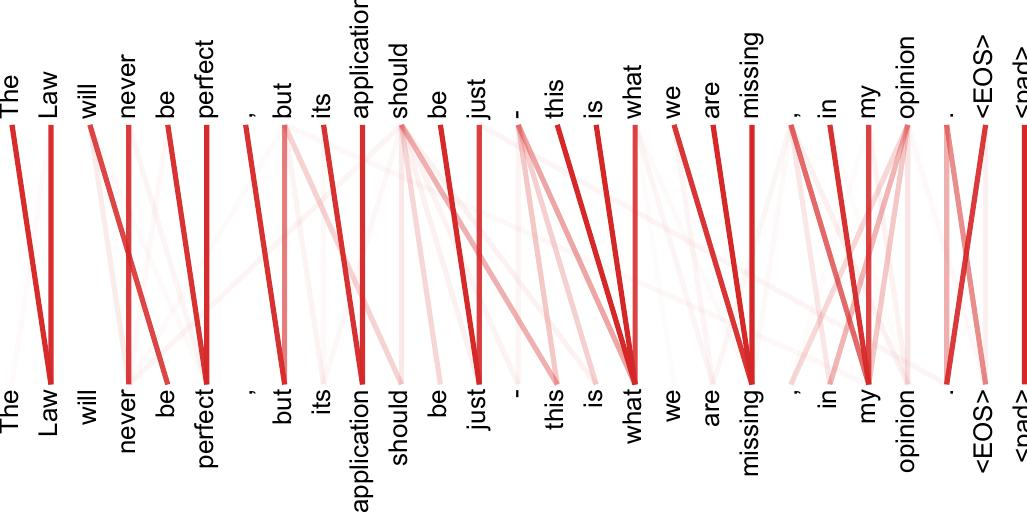

In [37]:
response = chain_with_sources.invoke(
    "What is the main method of the paper?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

## References

- [LangChain Inspiration](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)
- [Multivector Storage](https://python.langchain.com/docs/how_to/multi_vector/)